In [39]:
from typing import Dict, TypedDict
import decimal
from langgraph.graph import StateGraph

In [40]:
class AgentState(TypedDict):
    name : str
    balance : decimal
    transaction_value : decimal
    result: str

In [41]:
def bank_teller_node(state: AgentState) -> AgentState:
    state["result"] = f"Hi {state["name"]}, Your current balance is: £{state["balance"]}."
    return state

In [42]:
def transaction_node(state:AgentState) -> AgentState:
    state["result"] = state["result"] + f"\nTransaction of £{state["transaction_value"]} recieved. Processing Payment..."
    state["balance"] = state["balance"] - state["transaction_value"]
    state["result"] = state["result"] + f"\nPayment processed. Your new balance is: £{state["balance"]}."
    return state

In [43]:
graph = StateGraph(AgentState)
graph.add_node("bank_teller_node", bank_teller_node)
graph.add_node("transaction_node", transaction_node)
graph.set_entry_point("bank_teller_node")
graph.set_finish_point("transaction_node")
graph.add_edge("bank_teller_node", "transaction_node")
app = graph.compile()

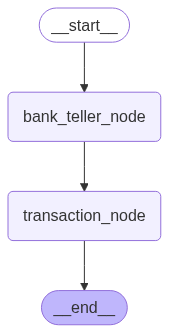

In [44]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
answer = app.invoke({"balance":2500, "transaction_value":200, "name":"Jack"})

print(answer["result"])

Hi Jack, Your current balance is: £2500.
Transaction of £200 recieved. Processing Payment...
Payment processed. Your new balance is: £2300.
